In [19]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [40]:
data = pd.read_csv('UKData.csv', encoding = 'unicode_escape')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  495478 non-null  object 
 1   StockCode     495478 non-null  object 
 2   Description   494024 non-null  object 
 3   Quantity      495478 non-null  int64  
 4   InvoiceDate   495478 non-null  object 
 5   UnitPrice     495478 non-null  float64
 6   CustomerID    361878 non-null  float64
 7   Country       495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [44]:
data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [45]:
#drop rows with no customerID 
data = data.dropna(subset=['CustomerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ï»¿InvoiceNo  361878 non-null  object        
 1   StockCode     361878 non-null  object        
 2   Description   361878 non-null  object        
 3   Quantity      361878 non-null  int64         
 4   InvoiceDate   361878 non-null  datetime64[ns]
 5   UnitPrice     361878 non-null  float64       
 6   CustomerID    361878 non-null  float64       
 7   Country       361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [46]:
data.dtypes

ï»¿InvoiceNo            object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
dtype: object

In [47]:
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])

In [48]:
data.dtypes 

ï»¿InvoiceNo            object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
dtype: object

In [60]:
#create an invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()                                                 

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,Cohort day,Cohort_index,InvoiceMonth
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011-12-09,2011-05-25,8,2011-12-01
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01
495477,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01


In [61]:
#create a column index with the minimum invoice date aka first time customer was acquired
data['Cohort Month'] =  data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(30)

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,Cohort day,Cohort_index,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,2010-12-01


In [62]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [63]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(data,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(data,'Cohort Month')

In [64]:
#check the series 
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [65]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,Cohort day,Cohort_index,InvoiceMonth,Cohort Month,CohortIndex
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011-12-09,2011-05-25,8,2011-12-01,2011-05-01,8
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01,2010-12-01,13
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01,2010-12-01,13
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01,2010-12-01,13
495477,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,2011-12-09,2010-12-08,13,2011-12-01,2010-12-01,13


In [66]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,871
1,2010-12-01,2,322
2,2010-12-01,3,291
3,2010-12-01,4,329
4,2010-12-01,5,308
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,40
88,2011-11-01,1,296
89,2011-11-01,2,41


In [67]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,871.0,322.0,291.0,329.0,308.0,345.0,327.0,304.0,306.0,346.0,320.0,429.0,238.0
2011-01-01,362.0,84.0,101.0,89.0,124.0,106.0,95.0,94.0,114.0,127.0,131.0,54.0,NaN
2011-02-01,339.0,85.0,65.0,95.0,96.0,86.0,88.0,96.0,94.0,106.0,33.0,NaN,NaN
2011-03-01,408.0,79.0,107.0,88.0,95.0,70.0,107.0,97.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,276.0,62.0,61.0,60.0,57.0,64.0,64.0,73.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,252.0,58.0,43.0,43.0,54.0,60.0,67.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,44.0,34.0,51.0,53.0,67.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,172.0,35.0,33.0,40.0,48.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,140.0,37.0,32.0,36.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

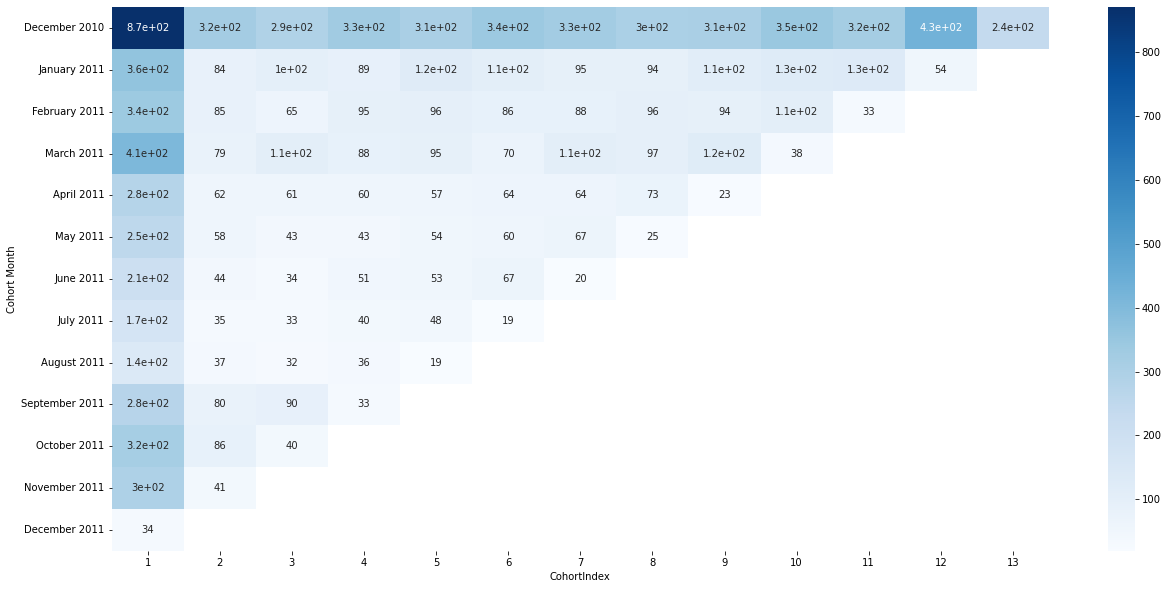

In [75]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [70]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December 2010,1.0,0.369690,0.334099,0.377727,0.353617,0.396096,0.375431,0.349024,0.351320,0.397245,0.367394,0.492537,0.273249
January 2011,1.0,0.232044,0.279006,0.245856,0.342541,0.292818,0.262431,0.259669,0.314917,0.350829,0.361878,0.149171,NaN
February 2011,1.0,0.250737,0.191740,0.280236,0.283186,0.253687,0.259587,0.283186,0.277286,0.312684,0.097345,NaN,NaN
March 2011,1.0,0.193627,0.262255,0.215686,0.232843,0.171569,0.262255,0.237745,0.291667,0.093137,NaN,NaN,NaN
April 2011,1.0,0.224638,0.221014,0.217391,0.206522,0.231884,0.231884,0.264493,0.083333,NaN,NaN,NaN,NaN
May 2011,1.0,0.230159,0.170635,0.170635,0.214286,0.238095,0.265873,0.099206,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.212560,0.164251,0.246377,0.256039,0.323671,0.096618,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.203488,0.191860,0.232558,0.279070,0.110465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.264286,0.228571,0.257143,0.135714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

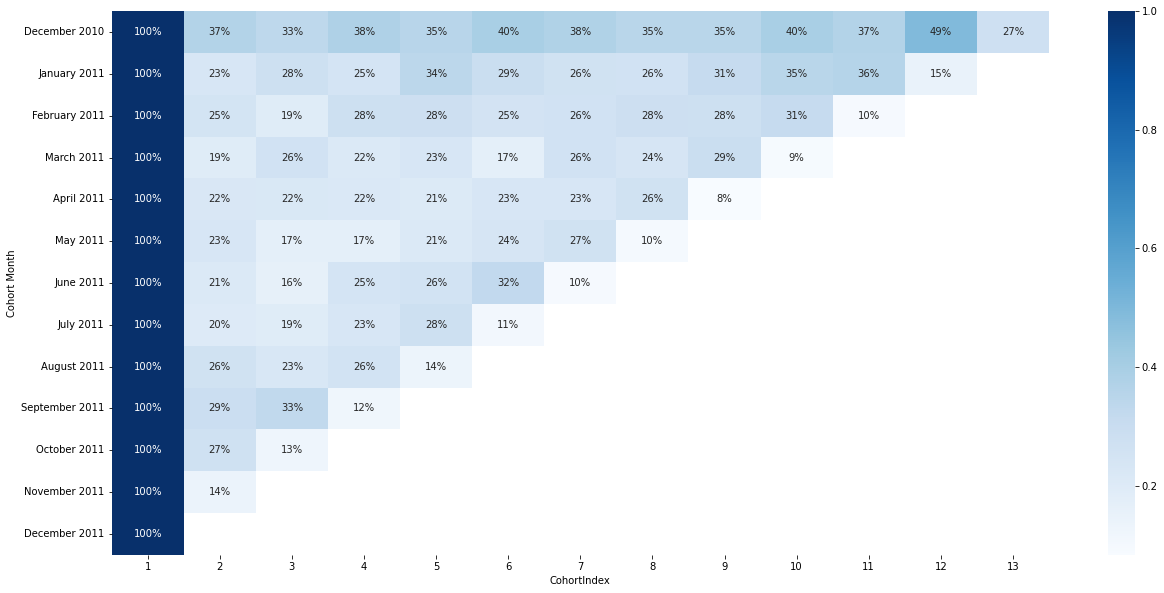

In [76]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,cmap='Blues',fmt='.0%')